In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Sampling frequency
fs = 1500  # Hz
nyq = 0.5 * fs

def rectify(data):
    rec = abs(data)
    return rec

def lowpass_filter(data, cutoff_l, fs, order):
    lp_cutoff = cutoff_l/nyq
    n, d = butter(order, lp_cutoff, btype='low', analog=False)
    filtered = filtfilt(n, d, data)
    return filtered

color = ["crimson", "purple",  "magenta", "orange", "yellow", "lime", "cyan", "lightseagreen", "green"]

# seperate a single curl of BB

In [19]:
BB = pd.read_csv(r"data\BB.csv")
BB = BB.values[:, 0]
time = np.arange(len(BB)) / fs
BB_rec = rectify(BB)
BB_lpf = lowpass_filter(BB_rec, 2, fs, order=4)

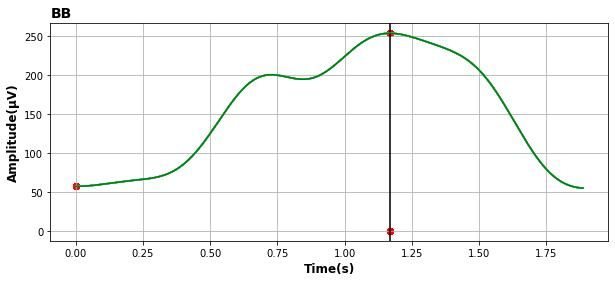

In [20]:
BB = BB_lpf
BB_curls = []
for i in range(9): 
    single_curl = BB[42169: 44999]
    BB_curls.append(single_curl)
BB_times = []
for i, single_curl in enumerate(BB_curls):
    time = np.arange(len(single_curl)) / fs
    BB_times.append(time)

plt.figure(figsize=(10, 4))
for k, (time, single_curl) in enumerate(zip(BB_times, BB_curls)):
    plt.plot(time, single_curl, color=color[k])
    plt.grid(True)
    plt.xlabel('')
    plt.title('BB', fontsize=14, fontweight='bold', loc='left')
    plt.ylabel('Amplitude(μV)', fontsize=12, fontweight='bold')
    plt.xlabel('Time(s)', fontsize=12, fontweight='bold')
    
    peak_indices, _ = find_peaks(single_curl)
    max_peak = peak_indices[np.argmax(single_curl[peak_indices])]
    peak_time = np.array(time)[max_peak]
    peak_value = single_curl[max_peak]
    plt.scatter(peak_time, peak_value, c='red', marker='o', label='Peaks')
    plt.scatter(peak_time, 0, c='red', marker='o', label='Peaks')
    plt.scatter(0, single_curl[0], c='red', marker='o', label='Peaks')
    plt.axvline(x=peak_time, color='black', alpha=0.2)

plt.show()

# seperate a single curl of AD

In [21]:
AD = pd.read_csv(r"data\AD.csv")
AD = AD.values[:, 0]
time = np.arange(len(AD)) / fs
AD_rec = rectify(AD)
AD_lpf = lowpass_filter(AD_rec, 2, fs, order=4)

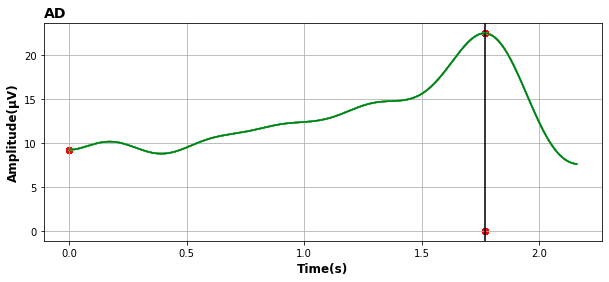

In [22]:
AD = AD_lpf
AD_curls = []
for i in range(9): 
    single_curl = AD[41758: 44999]
    AD_curls.append(single_curl)
AD_times = []
for i, single_curl in enumerate(AD_curls):
    time = np.arange(len(single_curl)) / fs
    AD_times.append(time)

plt.figure(figsize=(10, 4))
for k, (time, single_curl) in enumerate(zip(AD_times, AD_curls)):
    plt.plot(time, single_curl, color=color[k])
    plt.grid(True)
    plt.xlabel('')
    plt.title('AD', fontsize=14, fontweight='bold', loc='left')
    plt.ylabel('Amplitude(μV)', fontsize=12, fontweight='bold')
    plt.xlabel('Time(s)', fontsize=12, fontweight='bold')
    
    peak_indices, _ = find_peaks(single_curl)
    max_peak = peak_indices[np.argmax(single_curl[peak_indices])]
    peak_time = np.array(time)[max_peak]
    peak_value = single_curl[max_peak]
    plt.scatter(peak_time, peak_value, c='red', marker='o', label='Peaks')
    plt.scatter(peak_time, 0, c='red', marker='o', label='Peaks')
    plt.scatter(0, single_curl[0], c='red', marker='o', label='Peaks')
    plt.axvline(x=peak_time, color='black', alpha=0.2)

plt.show()

# Plot all single curl within one set into together

In [23]:
curl_AD = pd.read_excel(r"AD_onset.xlsx")

start = curl_AD.iloc[3:12, 0]    
stop = curl_AD.iloc[4:13, 0]
start = start.tolist()
stop = stop.tolist()
AD_curls = []
for i in range(9): 
    single_curl = AD[start[i]: stop[i]]
    AD_curls.append(single_curl)

AD_times = []
for i, single_curl in enumerate(AD_curls):
    time = np.arange(len(single_curl)) / fs
    AD_times.append(time)    

In [24]:
curl_BB = pd.read_excel(r"BB_onset.xlsx")

start = curl_BB.iloc[3:12, 0]    
stop = curl_BB.iloc[4:13, 0]
start = start.tolist()
stop = stop.tolist()
BB_curls = []
for i in range(9): 
    single_curl = BB[start[i]: stop[i]]
    BB_curls.append(single_curl)

BB_times = []
for i, single_curl in enumerate(BB_curls):
    time = np.arange(len(single_curl)) / fs
    BB_times.append(time)

In [25]:
"""
AD = [AD1_curls, AD2_curls, AD3_curls, AD4_curls]
PD = [PD1_curls, PD2_curls, PD3_curls, PD4_curls] 
BB = [BB1_curls, BB2_curls, BB3_curls, BB4_curls]
MT = [MT1_curls, MT2_curls, MT3_curls, MT4_curls] 
LT = [LT1_curls, LT2_curls, LT3_curls, LT4_curls]
FCR = [FCR1_curls, FCR2_curls, FCR3_curls, FCR4_curls] 
ECR = [ECR1_curls, ECR2_curls, ECR3_curls, ECR4_curls]
BR = [BR1_curls, BR2_curls, BR3_curls, BR4_curls] 
data = [AD, PD, BB, MT, LT, FCR, ECR, BR]

AD_times = [AD1_times, AD2_times, AD3_times, AD4_times]
PD_times = [PD1_times, PD2_times, PD3_times, PD4_times] 
BB_times = [BB1_times, BB2_times, BB3_times, BB4_times]
MT_times = [MT1_times, MT2_times, MT3_times, MT4_times] 
LT_times = [LT1_times, LT2_times, LT3_times, LT4_times]
FCR_times = [FCR1_times, FCR2_times, FCR3_times, FCR4_times] 
ECR_times = [ECR1_times, ECR2_times, ECR3_times, ECR4_times]
BR_times = [BR1_times, BR2_times, BR3_times, BR4_times] 
time = [AD_times, PD_times, BB_times, MT_times, LT_times, FCR_times, ECR_times, BR_times]



import matplotlib.pyplot as plt
from scipy.signal import find_peaks

num_rows = 8
num_cols = 4
figure, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
figure.suptitle('Subject AA', fontsize=30)

row_names = ["AD", "PD", "BB", "MT", "LT", "FCR", "ECR", "BR"]
col_names = ["SET1", "SET2", "SET3", "SET4"]

data_sets = [AD, PD, BB, MT, LT, FCR, ECR, BR]
time_sets = [AD_times, PD_times, BB_times, MT_times, LT_times, FCR_times, ECR_times, BR_times]


peak_info = []

for i, data_subject in enumerate(data_sets):
    for j, data_set in enumerate(data_subject):
        for k, (time, single_curl) in enumerate(zip(time_sets[i][j], data_set)):
            peak_indices, _ = find_peaks(single_curl) 
            if len(peak_indices) > 0:
                max_peak = peak_indices[np.argmax(single_curl[peak_indices])]
                peak_time = np.array(time)[max_peak]
                peak_value = single_curl[max_peak]
                peak_info.append({
                    'Row Name': row_names[i],
                    'Set Index': k + 1,
                    'Peak Time': peak_time,
                })
            
            axs[i, j].plot(time, single_curl, label=f'{row_names[i]}{k+1}', color=color[k])
            axs[i, j].scatter(peak_time, peak_value, c='red', marker='o', label='Peaks')
            if i==3 and j==0:
                print(peak_time)

plt.show()

# Convert peak_info to a pandas DataFrame
peak_df = pd.DataFrame(peak_info)

# Save the DataFrame to an Excel file
excel_filename = '1.xlsx'
peak_df.to_excel(excel_filename, index=False)

print(f"Peak information saved to '{excel_filename}'")

"""

'\nAD = [AD1_curls, AD2_curls, AD3_curls, AD4_curls]\nPD = [PD1_curls, PD2_curls, PD3_curls, PD4_curls] \nBB = [BB1_curls, BB2_curls, BB3_curls, BB4_curls]\nMT = [MT1_curls, MT2_curls, MT3_curls, MT4_curls] \nLT = [LT1_curls, LT2_curls, LT3_curls, LT4_curls]\nFCR = [FCR1_curls, FCR2_curls, FCR3_curls, FCR4_curls] \nECR = [ECR1_curls, ECR2_curls, ECR3_curls, ECR4_curls]\nBR = [BR1_curls, BR2_curls, BR3_curls, BR4_curls] \ndata = [AD, PD, BB, MT, LT, FCR, ECR, BR]\n\nAD_times = [AD1_times, AD2_times, AD3_times, AD4_times]\nPD_times = [PD1_times, PD2_times, PD3_times, PD4_times] \nBB_times = [BB1_times, BB2_times, BB3_times, BB4_times]\nMT_times = [MT1_times, MT2_times, MT3_times, MT4_times] \nLT_times = [LT1_times, LT2_times, LT3_times, LT4_times]\nFCR_times = [FCR1_times, FCR2_times, FCR3_times, FCR4_times] \nECR_times = [ECR1_times, ECR2_times, ECR3_times, ECR4_times]\nBR_times = [BR1_times, BR2_times, BR3_times, BR4_times] \ntime = [AD_times, PD_times, BB_times, MT_times, LT_times, FC

In [28]:
AD = [AD_curls]
BB = [BB_curls]
data = [AD, BB]

AD_times = [AD_times]
BB_times = [BB_times]
time = [AD_times, BB_times]


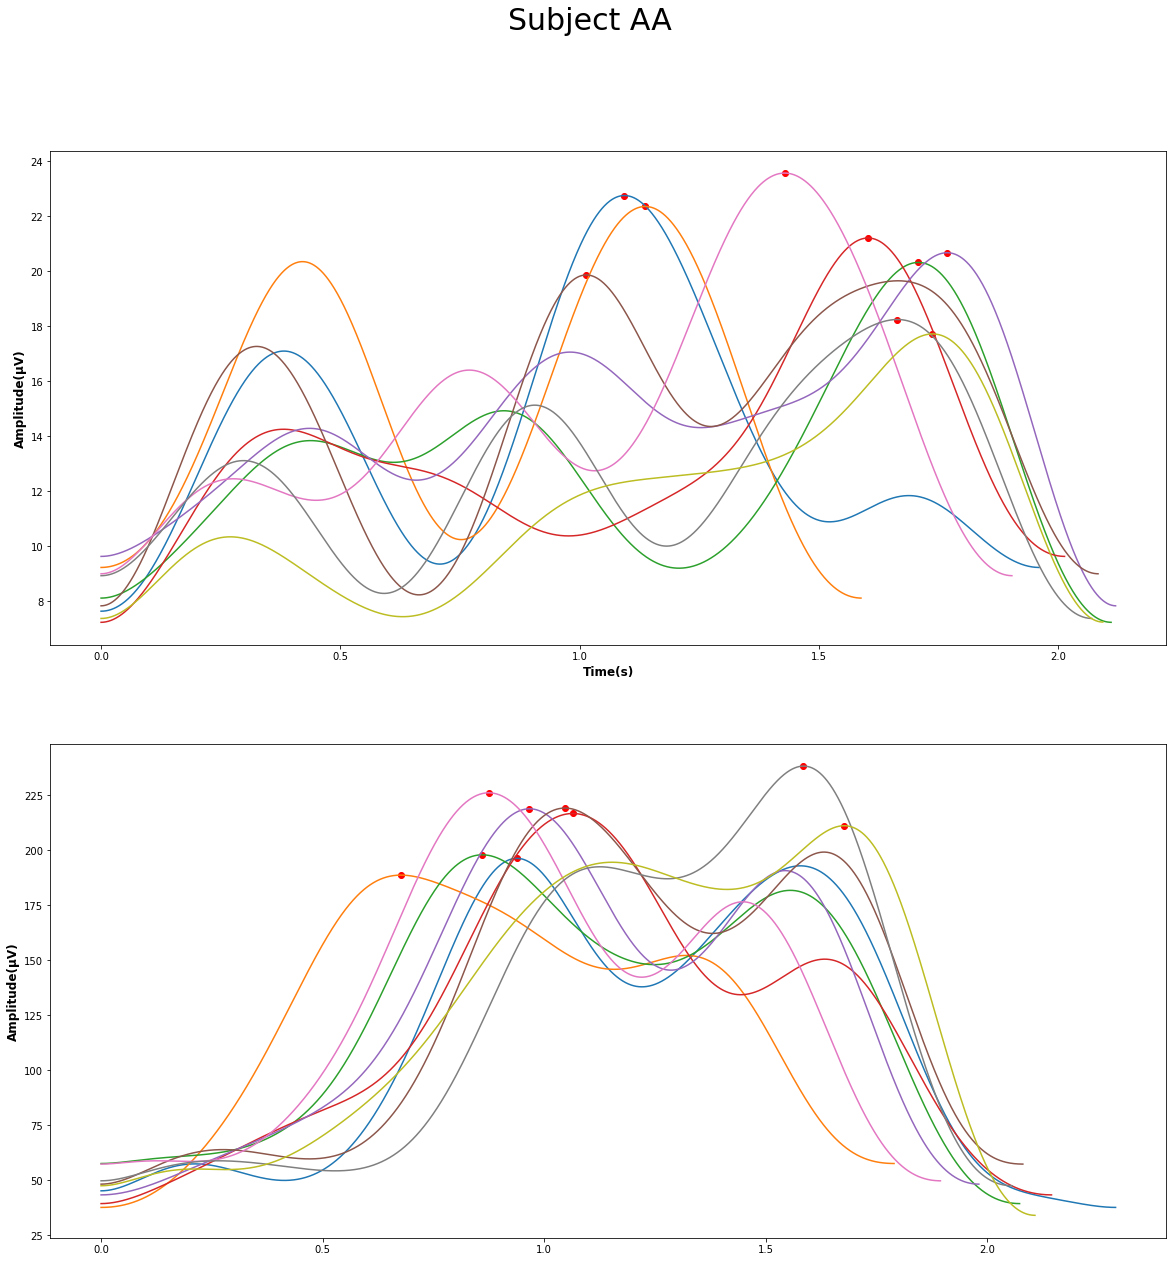

Peak information saved to 'peaks.xlsx'


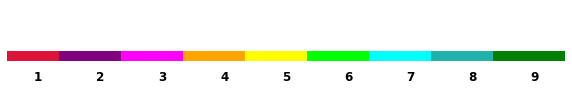

In [34]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import pandas as pd

num_rows = 2
num_cols = 1
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))
fig.suptitle('Subject AA', fontsize=30)

row_names = ["AD", "BB"]
col_names = ["SET1"]

data_sets = [AD, BB]
time_sets = [AD_times, BB_times]

peak_info = []

for i, data_subject in enumerate(data_sets):
    for j, data_set in enumerate(data_subject):
        for k, (time, single_curl) in enumerate(zip(time_sets[i][j], data_set)):
            peak_indices, _ = find_peaks(single_curl) 
            if len(peak_indices) > 0:
                max_peak = peak_indices[np.argmax(single_curl[peak_indices])]
                peak_time = np.array(time)[max_peak]
                peak_value = single_curl[max_peak]
                peak_info.append({
                    'Row Name': row_names[i],
                    'Set Index': k + 1,
                    'Peak Time': peak_time,
                })
            
            axs[i].plot(time, singlZe_curl, label=f'{row_names[i]}{k+1}')
            axs[i].scatter(peak_time, peak_value, c='red', marker='o', label='Peaks')
            axs[j].set_xlabel('Time(s)', fontsize=12, fontweight='bold')
            axs[i].set_ylabel('Amplitude(μV)', fontsize=12, fontweight='bold')
            
            if i == 0 and j == 1:
                print(peak_time)

plt.show()

# Convert peak_info to a pandas DataFrame
peak_df = pd.DataFrame(peak_info)

# Save the DataFrame to an Excel file
excel_filename = 'peaks.xlsx'
peak_df.to_excel(excel_filename, index=False)

print(f"Peak information saved to '{excel_filename}'")

# color 
sequence_words = [str(i + 1) for i in range(len(color))]
fig, ax = plt.subplots()
fig.set_size_inches(10, 1)
ax.axis('off')
for i, c in enumerate(color):
    ax.axhline(0, i / len(color), (i + 1) / len(color), color=c, linewidth=20)
ax_text = ax.inset_axes([0, -0.3, 1, 0.1])  # Adjust the [0, -0.3, 1, 0.1] values as per your preference
ax_text.axis('off')
for i, word in enumerate(sequence_words):
    ax_text.text((i + 0.5) / len(color), 0, word, ha='center', va='center', fontsize=12, fontweight='bold')
plt.show()    

